<img src="usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.


In [4]:
#primero dividimos el dataframe original en 4 dataframes, con la información de cada grupo de puntos 
ind1=[]
ind2=[]
ind3=[]
ind4=[]

lista_de_listas_de_indices=[ind1,ind2,ind3,ind4]          #lista de listas vacías
lista_de_grupos=['Grupo_1','Grupo_2','Grupo_3','Grupo_4']     #lista con los nombres de los grupos

cont=0
for i in lista_de_listas_de_indices:
    for j in df.index:                                      #mediante el doble for guardamos en cada lista vacía
        if df['grupo'][j]==lista_de_grupos[cont]:           #los índices de los puntos que se corresponden por grupo
            i.append(j)
    cont+=1

In [5]:
lista_de_listas_de_indices                  #visualizamos la lista con las listas de los índices

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]]

In [6]:
df1=df.filter(items=ind1,axis=0)
df2=df.filter(items=ind2,axis=0)
df3=df.filter(items=ind3,axis=0)                    #creamos dataframes por grupo
df4=df.filter(items=ind4,axis=0)

In [7]:
df1

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1
5,14,9.96,Grupo_1
6,6,7.24,Grupo_1
7,4,4.26,Grupo_1
8,12,10.84,Grupo_1
9,7,4.82,Grupo_1


In [8]:
df2

,x,y,grupo
11,10,9.14,Grupo_2
12,8,8.14,Grupo_2
13,13,8.74,Grupo_2
14,9,8.77,Grupo_2
15,11,9.26,Grupo_2
16,14,8.10,Grupo_2
17,6,6.13,Grupo_2
18,4,3.10,Grupo_2
19,12,9.13,Grupo_2
20,7,7.26,Grupo_2


In [9]:
df3

,x,y,grupo
22,10,7.46,Grupo_3
23,8,6.77,Grupo_3
24,13,12.74,Grupo_3
25,9,7.11,Grupo_3
26,11,7.81,Grupo_3
27,14,8.84,Grupo_3
28,6,6.08,Grupo_3
29,4,5.39,Grupo_3
30,12,8.15,Grupo_3
31,7,6.42,Grupo_3


In [10]:
df4

,x,y,grupo
33,8,6.58,Grupo_4
34,8,5.76,Grupo_4
35,8,7.71,Grupo_4
36,8,8.84,Grupo_4
37,8,8.47,Grupo_4
38,8,7.04,Grupo_4
39,8,5.25,Grupo_4
40,19,12.50,Grupo_4
41,8,5.56,Grupo_4
42,8,7.91,Grupo_4


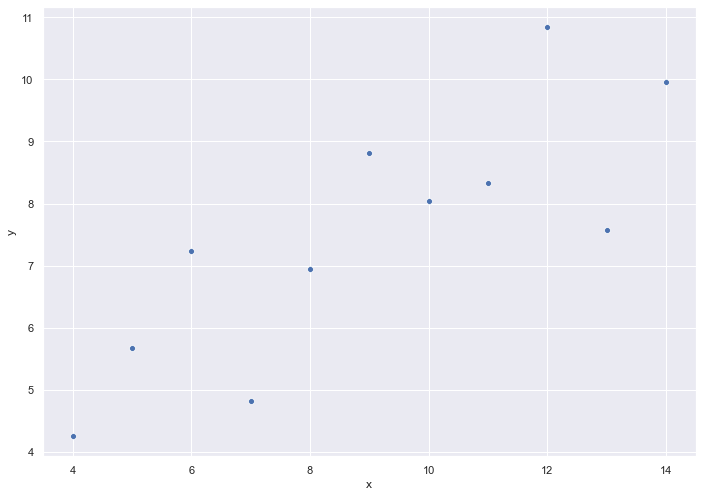

In [11]:
#gráfico del Grupo_1
sns.scatterplot(
    x='x',
    y='y',
   data=df1,
     ci=None,
)

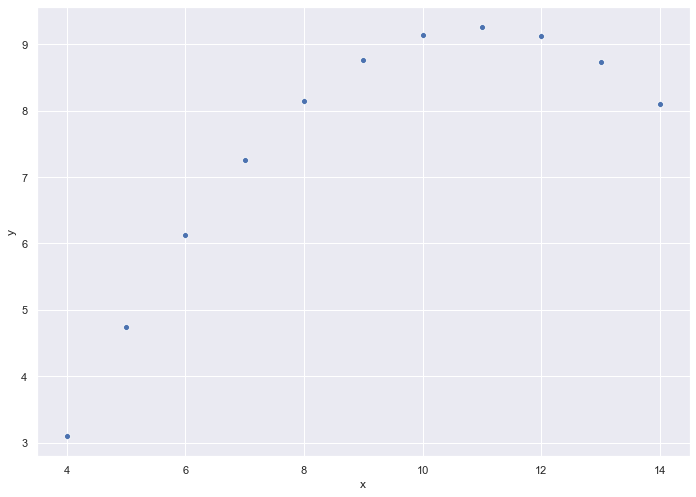

In [12]:
#gráfico del Grupo_2
sns.scatterplot(
    x='x',
    y='y',
   data=df2,
     ci=None,
)

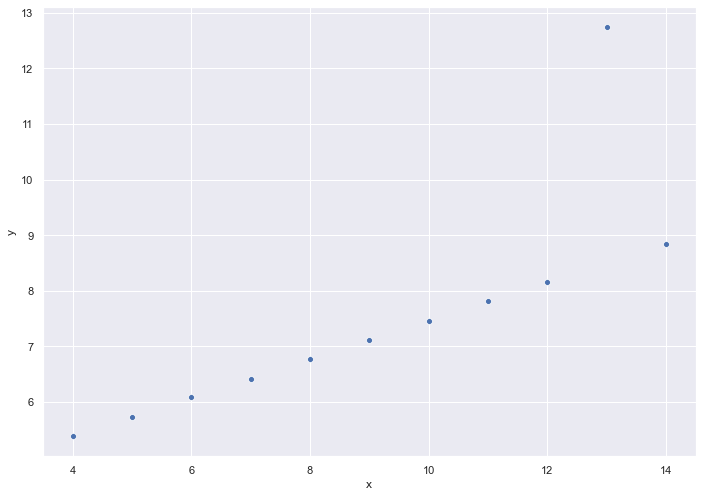

In [13]:
#gráfico del Grupo_3
sns.scatterplot(
    x='x',
    y='y',
   data=df3,
     ci=None,
)

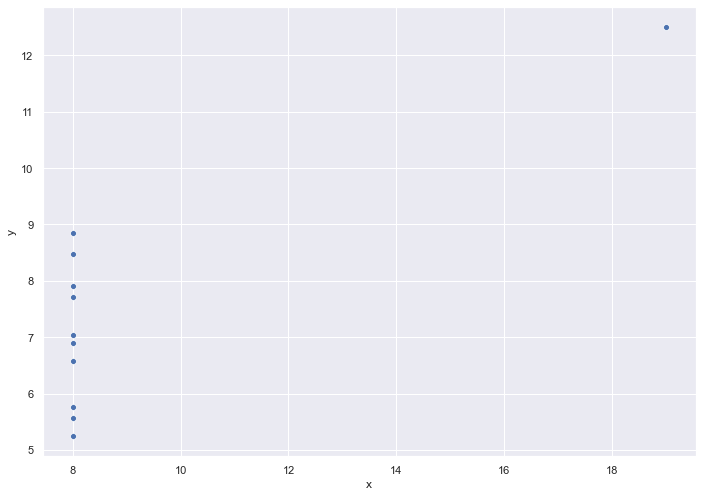

In [14]:
#gráfico del Grupo_4
sns.scatterplot(
    x='x',
    y='y',
   data=df4,
     ci=None,
)

A simple vista los grupos son bastante diferentes entre sí, dado que la disposición espacial de los puntos en cada caso difiere de los demás, de esta manera tenemos 4 disposiciones diferentes: lineal, parábolica , nube y una recta vertical. 

2. Realice un resumen de las medidas estadísticas más significativas ocupando el comando **describe** para cada grupo. Interprete.
 

In [15]:
df1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [16]:
df2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [17]:
df3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [18]:
df4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Al observar el resumen de estadístcos por grupo, es posible percatarse de que los valores de dichos estadísticos son bastante cercanos a diferencias de sus gráficas, las cuales son notoriamente diferentes. 

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
 

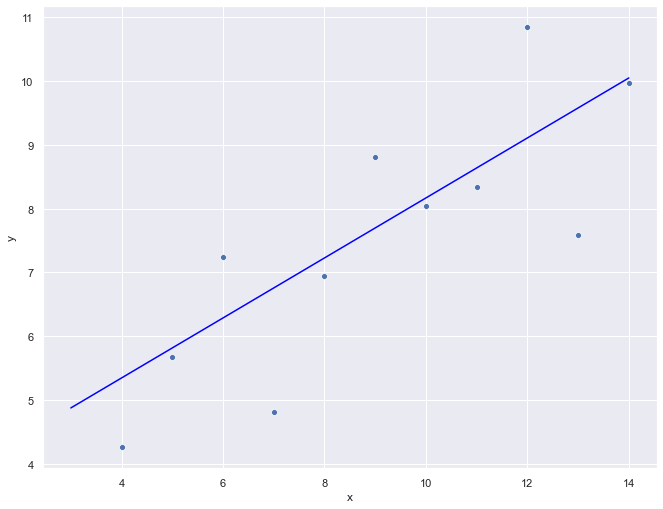

In [20]:
from sklearn.linear_model import LinearRegression 
from sklearn import datasets
from sklearn.model_selection import train_test_split

model_RL1= LinearRegression()

X1=df1[['x']]
y1=df1['y']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model_RL1.fit(X_train1,y_train1)

beta_0=model_RL1.intercept_
beta_1=model_RL1.coef_[0]
x_range_1=np.arange(3,15,1)

DF1_plot=pd.DataFrame({'x':x_range_1,'y_true':[beta_0+beta_1*i for i in x_range_1]})

DF1=pd.DataFrame({'x':X1['x'],'y_true':y1})

figure, ax = plt.subplots(figsize=(11,8.5))

sns.scatterplot(
    x='x',
    y='y_true',
    data=DF1,
    ax=ax
)


sns.lineplot(
    x='x',
    y='y_true',
    data=DF1_plot,
    ax=ax,
    color='blue'
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

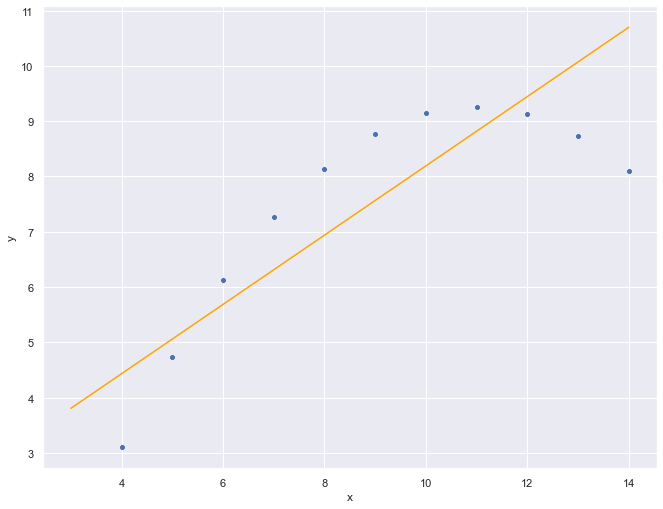

In [22]:
model_RL2= LinearRegression()

X2=df2[['x']]
y2=df2['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model_RL2.fit(X_train2,y_train2)

beta_0=model_RL2.intercept_
beta_1=model_RL2.coef_[0]
x_range_2=np.arange(3,15,1)

DF2_plot=pd.DataFrame({'x':x_range_2,'y_true':[beta_0+beta_1*i for i in x_range_2]})

DF2=pd.DataFrame({'x':X2['x'],'y_true':y2})

figure, ax = plt.subplots(figsize=(11,8.5))

sns.scatterplot(
    x='x',
    y='y_true',
    data=DF2,
    ax=ax
)


sns.lineplot(
    x='x',
    y='y_true',
    data=DF2_plot,
    ax=ax,
    color='orange'
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

En el gráfico anterior, es posible deducir que un modelo lineal no es el indicado, dado que la disposición de los datos se asemeja al de una parábola.

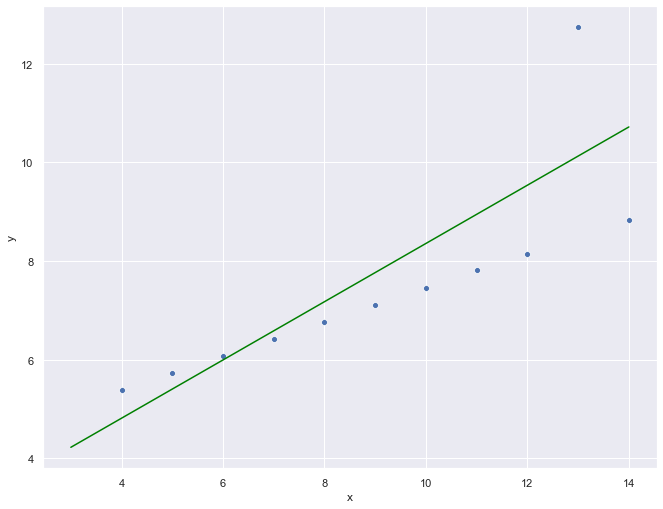

In [23]:
model_RL3= LinearRegression()

X3=df3[['x']]
y3=df3['y']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model_RL3.fit(X_train3,y_train3)

beta_0=model_RL3.intercept_
beta_1=model_RL3.coef_[0]
x_range_3=np.arange(3,15,1)

DF3_plot=pd.DataFrame({'x':x_range_3,'y_true':[beta_0+beta_1*i for i in x_range_3]})

DF3=pd.DataFrame({'x':X3['x'],'y_true':y3})

figure, ax = plt.subplots(figsize=(11,8.5))

sns.scatterplot(
    x='x',
    y='y_true',
    data=DF3,
    ax=ax
)


sns.lineplot(
    x='x',
    y='y_true',
    data=DF3_plot,
    ax=ax,
    color='green'
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

En este gráfico existe un dato que al esta bastante alejado de los demás, genera un problema en la adaptación de la recta.

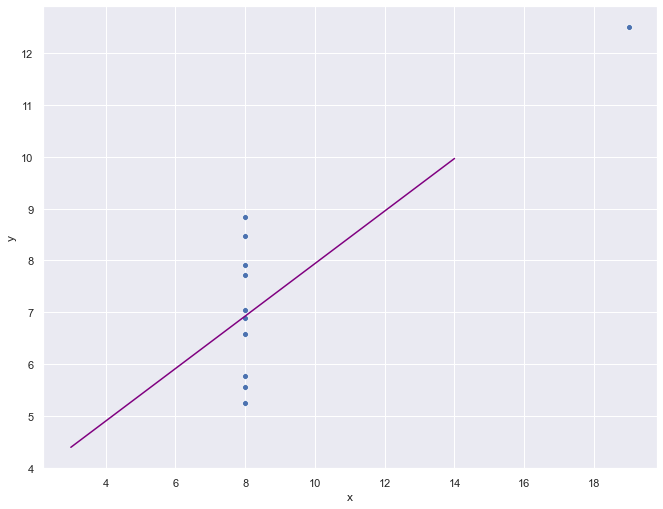

In [25]:
model_RL4= LinearRegression()

X4=df4[['x']]
y4=df4['y']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

model_RL4.fit(X_train4,y_train4)

beta_0=model_RL4.intercept_
beta_1=model_RL4.coef_[0]
x_range_4=np.arange(3,15,1)

DF4_plot=pd.DataFrame({'x':x_range_4,'y_true':[beta_0+beta_1*i for i in x_range_4]})

DF4=pd.DataFrame({'x':X4['x'],'y_true':y4})

figure, ax = plt.subplots(figsize=(11,8.5))

sns.scatterplot(
    x='x',
    y='y_true',
    data=DF4,
    ax=ax
)


sns.lineplot(
    x='x',
    y='y_true',
    data=DF4_plot,
    ax=ax,
    color='purple'
)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

En este gráfico se tiene un situación parecida al del grupo 3

4. Calcule los resultados de las métricas para cada grupo. Interprete.
  

In [29]:
from metrics_regression import *
from sklearn.metrics import r2_score
 
df_temp1 = pd.DataFrame(
    {   'y':y_test1,
        'yhat': model_RL1.predict(X_test1)
        }
)

df_metrics1 = summary_metrics(df_temp1)
df_metrics1['r2'] =  round(r2_score(y_test1, model_RL1.predict(X_test1)),4)
print(df_metrics1)

      mae     mse    rmse   mape   maape   wmape   mmape   smape      r2
0  0.7161  1.2576  1.1214  0.142  0.1354  0.0941  0.1182  0.1196  0.7204


Dado que los errores de interés son cercanos a cero y que "r2" se acerca más a 1, es posible concluir que el modelo es relativamente bueno.

In [30]:
 df_temp2 = pd.DataFrame(
    {   'y':y_test2,
        'yhat': model_RL2.predict(X_test2)
        }
)

df_metrics2 = summary_metrics(df_temp2)
df_metrics2['r2'] =  round(r2_score(y_test2, model_RL2.predict(X_test2)),4)
print(df_metrics2)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.4986  2.8504  1.6883  0.1851  0.1813  0.1835  0.1647  0.1752 -3.8207


En este caso, tenemos un "r2" negativo, lo cual se traduce en que el modelo es malo para los datos que se tienen.

In [31]:
 df_temp3 = pd.DataFrame(
    {   'y':y_test3,
        'yhat': model_RL3.predict(X_test3)
        }
)

df_metrics3 = summary_metrics(df_temp3)
df_metrics3['r2'] =  round(r2_score(y_test3, model_RL3.predict(X_test3)),4)
print(df_metrics3)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9813  1.4548  1.2062  0.1196  0.1184  0.1296  0.1065  0.1105 -0.4807


En este caso al igual que el anterior tenemos un "r2" negativo, luego el modelo no es bueno, principalmente porque para efectos de interpretación, cuando "r2" es negativo, éste se interpreta como si fuera igual a cero.

In [32]:
 df_temp4 = pd.DataFrame(
    {   'y':y_test4,
        'yhat': model_RL4.predict(X_test4)
        }
)

df_metrics4 = summary_metrics(df_temp4)
df_metrics4['r2'] =  round(r2_score(y_test4, model_RL4.predict(X_test4)),4)
print(df_metrics4)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.4814  0.3671  0.6059  0.0644  0.0642  0.0671  0.0568  0.0668 -0.2071


Nuevamente tenemos un "r2" negativo, por lo cual la capacidad predictiva del modelo no es buena.

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

En el grupo 1 es posible percatarse de que no existe gran problema respecto a los datos, pero en cambio en el grupo 2, se tiene que la disposición de los datos tiene forma parabólica por lo cual , sería más conveniente realizar un modelo del tipo cuadrático.

Respecto al grupo 3, se tiene que existe un outlier, por lo que una buena idea sería eliminar éste para obtener un mejor ajuste, situación que también se da para el grupo 4.
